### РОССИЙСКИЙ УНИВЕРСИТЕТ ДРУЖБЫ НАРОДОВ

#### Факультет физико-математических и естественных наук  
#### Кафедра математического моделирования и искусственного интеллекта

## ОТЧЕТ ПО КОНТРОЛЬНОЙ РАБОТЕ № 7


### Дисциплина: Методы машинного обучения

##### Студент:  Генералов Даниил
##### Группа:   НПИбд-01-21

## Москва 2024
***

Вариант 29 

1. Набор данных: imagenette/160px-v2 с изменением разрешения до 32х32 

2. Диапазон классов: 0, 2, 4, 6 

3. Архитектура автокодировщика: MLP 

4. Показатель качества: максимальная ошибка (MaxErr) для ошибки реконструкции 

5. Показатель качества бинарной классификации: 

индекс Жаккара, равный TP/(TP + FP + FN) 

 

1.	Загрузите заданный в индивидуальном задании набор данных с изображениями из Tensorflow Datasets с разбиением на обучающую и тестовую выборки. Оставьте в обучающей и тестовой выборках диапазон классов, указанных в индивидуальном задании. Если изображения цветные (с тремя каналами), то перекодируйте их в одноцветные (оттенки серого).
2.	Постройте для набора данных график логарифмического правдоподобия профиля в зависимости от числа главных компонент и определите размерность латентного пространства.
3.	Создайте и обучите на обучающей выборке автокодировщик архитектуры, указанной в индивидуальном задании, с размерностью скрытого представления, равной размерности латентного пространства, определенной в п.2. Подберите такие параметры, как функции активации, оптимизатор, начальная скорость обучения, размер мини-пакета и др. самостоятельно, обеспечивая обучение нейронных сетей. Визуализируйте несколько исходных и восстановленных автокодировщиком изображений. 
4.	Оцените качество модели автокодировщика на тестовой выборке по показателю, указанному в индивидуальном задании.
5.	Оставьте в наборах изображения первых двух классов диапазона, указанного в индивидуальном задании первыми. Визуализируйте набор данных на плоскости, соответствующей двум первым латентным признакам, отображая точки различных классов разными цветами. Подпишите оси и рисунок, создайте легенду для классов набора данных.
6.	Выполните бинарную классификацию изображений по латентным (скрытым) признакам и всем признакам при помощи классификатора метода ближайших соседей (kNN). Оцените долю верных ответов (accuracy) для двух построенных классификаторов
7.	Визуализируйте ROC-кривые для построенных классификаторов на одном рисунке (с легендой) (Указание: используйте метод predict_proba() класса KNeighborsClassifier).
8.	Визуализируйте границы принятия решений классификатора kNN для латентных признаков на плоскости, соответствующей двум первым латентным признакам (для прочих латентных признаков задайте средние/медианные значения). 
9.	Определите на первоначальной тестовой выборке изображение, имеющее наибольшую ошибку реконструкции. Выведите для этого изображения первоначальное и реконструированное изображения. 


# 1. датасет

In [1]:
# %pip install tfds-nightly
# %pip install numpy
# %pip install pandas
# %pip install matplotlib
# %pip install tensorflow
# %pip install pillow
# %pip install tensorflow_model_analysis
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
import tensorflow_datasets as tfds
import PIL

2024-05-30 20:52:56.688789: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-05-30 20:52:57.623977: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
ds = tfds.load("imagenette/160px-v2")

2024-05-30 20:53:05.074578: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:282] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected


In [3]:
list(ds)

['train', 'validation']

In [4]:
df_train = tfds.as_dataframe(ds['train'])
df_test = tfds.as_dataframe(ds['validation'])

2024-05-30 20:53:07.380454: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
2024-05-30 20:53:08.310775: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [5]:
TARGET_CLASSES = [0,2,4,6]
df_train = df_train[df_train['label'].isin(TARGET_CLASSES)]
df_test = df_test[df_test['label'].isin(TARGET_CLASSES)]
train_images = df_train['image'].to_numpy()
train_labels = df_train['label'].to_numpy()
test_images = df_test['image'].to_numpy()
test_labels = df_test['label'].to_numpy()

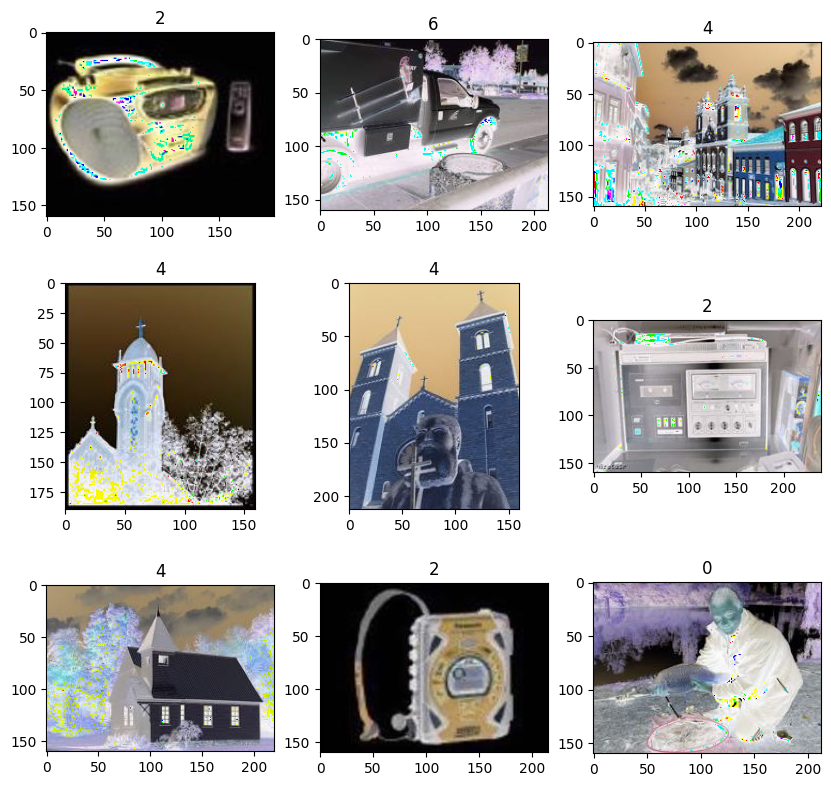

In [6]:
fig, ax = plt.subplots(3, 3, figsize=(10, 10))
for i in range(3):
    for j in range(3):
        ax[i][j].set_title(train_labels[i * 3 + j])
        ax[i][j].imshow(PIL.Image.fromarray((train_images[i * 3 + j] * 255).astype(np.uint8)))

In [7]:
# scale images
WIDTH = 32
HEIGHT = 32

train_images = np.array([np.array(PIL.Image.fromarray(i).resize((WIDTH, HEIGHT))) for i in train_images])
test_images = np.array([np.array(PIL.Image.fromarray(i).resize((WIDTH, HEIGHT))) for i in test_images])

In [8]:
# grayscale the images
train_images = np.array([np.array(PIL.Image.fromarray(i).convert('L')) for i in train_images])
test_images = np.array([np.array(PIL.Image.fromarray(i).convert('L')) for i in test_images])

In [9]:
train_images = 1 - train_images
test_images = 1 - test_images

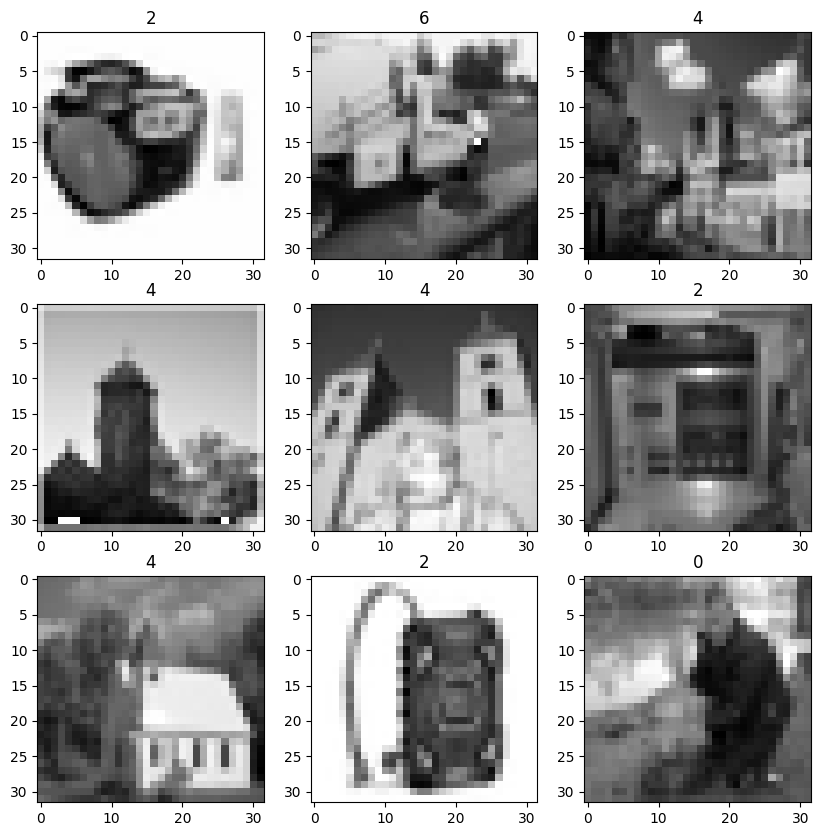

In [10]:
fig, ax = plt.subplots(3, 3, figsize=(10, 10))
for i in range(3):
    for j in range(3):
        ax[i][j].set_title(train_labels[i * 3 + j])
        ax[i][j].imshow(PIL.Image.fromarray((train_images[i * 3 + j] * 255).astype(np.uint8)), cmap='gray')

In [11]:
len(train_images), len(test_images)

(3858, 1542)

# 2. логарифмическое правдоподобие профиля

In [12]:
from sklearn.decomposition import PCA
from sklearn.metrics import root_mean_squared_error
from scipy.stats import multivariate_normal
import warnings
warnings.simplefilter("ignore", RuntimeWarning)  # for some NaN values

# Function to calculate log likelihood of PCA from eigenvalues

def log_likelihood(evals):

    Lmax = len(evals)
    ll = np.arange(0.0, Lmax)

    for L in range(Lmax):

        group1 = evals[0 : L + 1]  # Divide Eigenvalues in two groups
        group2 = evals[L + 1 : Lmax]

        mu1 = np.mean(group1)
        mu2 = np.mean(group2)

        sigma = (np.sum((group1 - mu1) ** 2) + np.sum((group2 - mu2) ** 2)) / Lmax

        ll_group1 = np.sum(multivariate_normal.logpdf(group1, mu1, sigma))
        ll_group2 = np.sum(multivariate_normal.logpdf(group2, mu2, sigma))

        ll[L] = ll_group1 + ll_group2 

    return ll

In [13]:
train_images_flattened = train_images.reshape(train_images.shape[0], -1)
test_images_flattened = test_images.reshape(test_images.shape[0], -1)

train_images_flattened = train_images_flattened[train_labels == 0]
test_images_flattened = test_images_flattened[test_labels == 0]

train_images_flattened_full = train_images.reshape(train_images.shape[0], -1)
test_images_flattened_full = test_images.reshape(test_images.shape[0], -1)

In [14]:
X_rank = np.linalg.matrix_rank(train_images_flattened)
K_linspace = np.linspace(1, 0.75 * X_rank, 10, dtype=int)
Ks = np.unique(np.append([1, 5, 10, 20], K_linspace))

RMSE_train = np.arange(len(Ks))
RMSE_test = np.arange(len(Ks))

for index, K in enumerate(Ks):
    pca = PCA(n_components=K)

    Xtrain_transformed = pca.fit_transform(train_images_flattened)
    Xtrain_proj = pca.inverse_transform(Xtrain_transformed)
    RMSE_train[index] = root_mean_squared_error(train_images_flattened, Xtrain_proj)

    Xtest_transformed = pca.transform(test_images_flattened)
    Xtest_proj = pca.inverse_transform(Xtest_transformed)
    RMSE_test[index] = root_mean_squared_error(test_images_flattened, Xtest_proj)

In [15]:
# profile log likelihood for PCA

n_samples, n_features = train_images_flattened.shape
Kmax = min(n_samples, n_features)

pca = PCA(n_components=Kmax)
X_transformed = pca.fit_transform(train_images_flattened)
evals = pca.explained_variance_  # eigenvalues in descending order

ll = log_likelihood(evals)

# Fraction of variance explained

fraction_var = np.cumsum(evals[0:50] / np.sum(evals))

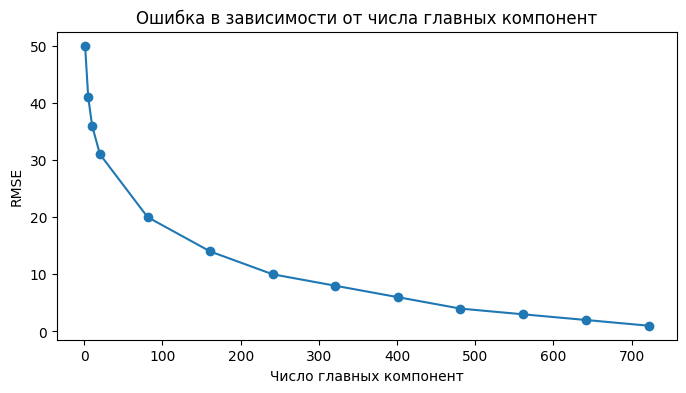

In [16]:
fig, ax = plt.subplots(figsize=(8, 4))
xs = Ks
ys = RMSE_train
plt.title("Ошибка в зависимости от числа главных компонент")
plt.xlabel("Число главных компонент")
plt.ylabel("RMSE")
ax.plot(xs, ys, marker="o")
plt.show()

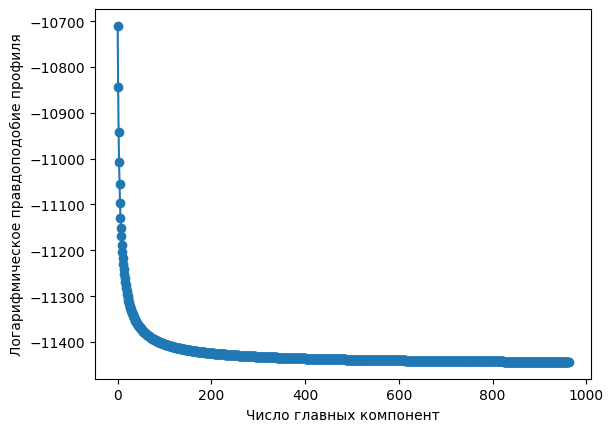

In [17]:
fig, ax = plt.subplots()
plt.xlabel("Число главных компонент")
plt.ylabel("Логарифмическое правдоподобие профиля")

ax.plot(ll, marker="o")
plt.show()

In [103]:
LATENT_SPACE_DIM = 32  # ???

# 3. автокодировщик

In [19]:
train_images = train_images / 255.0
test_images = test_images / 255.0

In [104]:
from tensorflow.keras import layers as L
from tensorflow.keras.models import Model

encoder_sizes = [400, 200]
decoder_sizes = [400, 200]

src = L.Input(shape=(WIDTH, HEIGHT), name='input')
flat = L.Flatten(name='input_flat')(src)
downsizings = [flat]

for i, size in enumerate(encoder_sizes):
    new_downsizer = L.Dense(size, activation='relu', name=f'downsizer{i}')
    downsizings.append(new_downsizer(downsizings[-1]))

latent = L.Dense(LATENT_SPACE_DIM, activation='relu', name='latent')(downsizings[-1])

upsizings = [latent]
for i, size in enumerate(decoder_sizes):
    new_upsizer = L.Dense(size, activation='relu', name=f'upsizer{i}')
    upsizings.append(new_upsizer(upsizings[-1]))

dst = L.Dense(WIDTH * HEIGHT, activation='sigmoid', name='output_flat')(upsizings[-1])
dst_inflated = L.Reshape((WIDTH, HEIGHT), name='output')(dst)

encoder = Model(src, latent)
decoder = Model(latent, dst_inflated)

autoencoder = Model(src, dst_inflated)

In [105]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [107]:
early_stop_callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)

In [108]:
autoencoder_hist = autoencoder.fit(
    train_images, train_images,
    epochs=200,
    batch_size=256,
    validation_data=(test_images, test_images),
    shuffle=True,
    callbacks=[early_stop_callback]
)

Epoch 1/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - accuracy: 0.0373 - loss: 0.6869 - val_accuracy: 0.0366 - val_loss: 0.6614
Epoch 2/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.0427 - loss: 0.6561 - val_accuracy: 0.0474 - val_loss: 0.6394
Epoch 3/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.0512 - loss: 0.6381 - val_accuracy: 0.0522 - val_loss: 0.6275
Epoch 4/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.0584 - loss: 0.6286 - val_accuracy: 0.0469 - val_loss: 0.6279
Epoch 5/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.0556 - loss: 0.6270 - val_accuracy: 0.0648 - val_loss: 0.6226
Epoch 6/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.0638 - loss: 0.6222 - val_accuracy: 0.0560 - val_loss: 0.6293
Epoch 7/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.0617 - loss: 0.6242 - val_accuracy: 0.0545 - val_loss: 0.6290
Epoch 8/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.0674 - loss: 0.6203 - val_accuracy: 0.

In [109]:
def image_show(orig_imgs, dec_imgs, fname=None):
    n = 10  # кол-во изображений
    fig = plt.figure(figsize=(20, 4))
    for i in range(n):
        # исходные изображения
        ax = plt.subplot(2, n, i + 1)
        plt.imshow(orig_imgs[i])
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

        # реконструированные изображения
        ax = plt.subplot(2, n, i + 1 + n)
        plt.imshow(dec_imgs[i])
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
    plt.tight_layout()
    plt.show()


In [110]:
decoded_imgs = autoencoder.predict(test_images)

49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


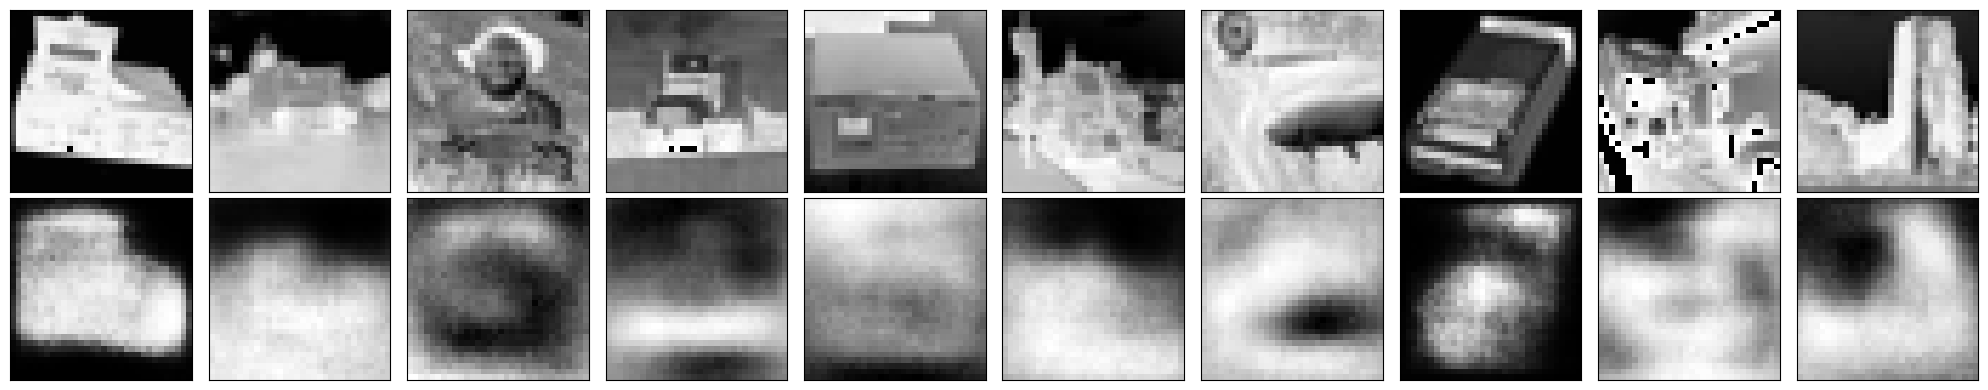

In [111]:
image_show(test_images, decoded_imgs)

In [112]:
for i in range(2, len(autoencoder.layers)-1): assert np.all(np.isfinite(autoencoder.layers[i].kernel.numpy()))

# 4. оценка качества

In [113]:
from sklearn import metrics

test_img_flat = test_images.reshape(test_images.shape[0], -1)
pred_img_flat = decoded_imgs.reshape(test_images.shape[0], -1)
maxerr = np.max(np.abs(test_img_flat - pred_img_flat))
maxerr

0.992803419008851

# 5. визуализация качества

In [114]:
# keep only the first two classes
train_imgs_only2 = train_images[train_labels < 3]  # 0, 2
train_labels_only2 = train_labels[train_labels < 3]
test_imgs_only2 = test_images[test_labels < 3]
test_labels_only2 = test_labels[test_labels < 3]

imgs_only2 = np.concatenate((train_imgs_only2, test_imgs_only2), axis=0)
labels_only2 = np.concatenate((train_labels_only2, test_labels_only2), axis=0)

imgs_only2_enc = encoder.predict(imgs_only2)
imgs_only2_enc

85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


array([[0.        , 4.226867  , 6.043134  , ..., 0.        , 0.11342901,
        3.1171143 ],
       [0.        , 3.5173497 , 2.6609433 , ..., 0.        , 0.        ,
        1.3972023 ],
       [0.        , 2.1109166 , 5.711333  , ..., 0.        , 0.        ,
        0.7434961 ],
       ...,
       [0.        , 2.97277   , 1.0985998 , ..., 0.        , 0.        ,
        1.1068199 ],
       [0.        , 3.5165045 , 5.900184  , ..., 0.        , 0.        ,
        2.0563393 ],
       [0.        , 4.1968164 , 7.66128   , ..., 0.        , 0.        ,
        0.56785816]], dtype=float32)

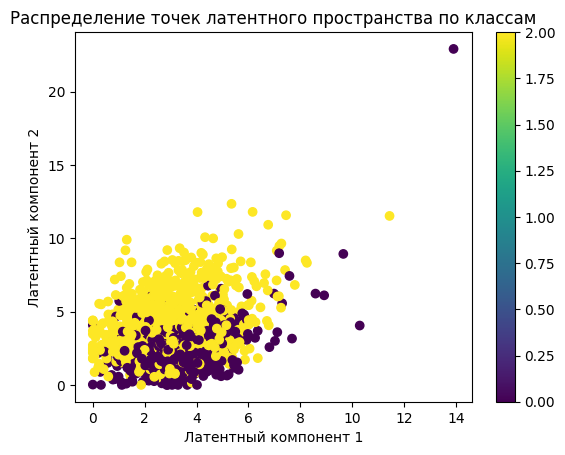

In [118]:
# take the first 2 latent components,
# and plot them
plt.scatter(imgs_only2_enc[:,1], imgs_only2_enc[:,2], c=labels_only2, cmap='viridis')
plt.xlabel("Латентный компонент 1")
plt.ylabel("Латентный компонент 2")
plt.title("Распределение точек латентного пространства по классам")
plt.colorbar()
plt.show()

# 6. KNN-классификация

In [121]:
def flatten(X):
    return np.reshape(X, (X.shape[0], -1))

In [176]:
def jaccard(y_true, y_pred):
    intersection = np.logical_and(y_true, y_pred)
    union = np.logical_or(y_true, y_pred)
    return np.sum(intersection) / np.sum(union)

In [179]:
from sklearn.neighbors import KNeighborsClassifier 
import time
start = time.perf_counter()
knn_full_img = KNeighborsClassifier(n_neighbors=15).fit(flatten(train_imgs_only2), 
                                              train_labels_only2) 
print("Fit: ", time.perf_counter() - start)

accuracy = knn_full_img.score(flatten(test_imgs_only2), test_labels_only2) 
print ("Accuracy KNN по всему изображению: ", accuracy)

pred = knn_full_img.predict(flatten(test_imgs_only2))
jac = jaccard(test_labels_only2, pred)
print ("Jaccard KNN по всему изображению: ", jac)


Fit:  0.0035335679986019386
Accuracy KNN по всему изображению:  0.7809139784946236
Jaccard KNN по всему изображению:  0.5831202046035806


In [181]:
start = time.perf_counter()
latent_imgs = encoder.predict(train_imgs_only2)
knn_latent_img = KNeighborsClassifier(n_neighbors=15).fit(latent_imgs, 
                                              train_labels_only2) 
print("Fit: ", time.perf_counter() - start)

latent_imgs_test = encoder.predict(test_imgs_only2)
accuracy = knn_latent_img.score(latent_imgs_test, test_labels_only2) 
print ("Accuracy KNN по латентному изображению: ", accuracy)

pred = knn_latent_img.predict(latent_imgs_test)
jac = jaccard(test_labels_only2, pred)
print ("Jaccard KNN по латентному изображению: ", jac)

 1/62 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step

62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Fit:  0.41406424900014827
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Accuracy KNN по латентному изображению:  0.7862903225806451
Jaccard KNN по латентному изображению:  0.5923076923076923


# 7. ROC-кривые для классификаторов

In [136]:
bin_test_labels = (test_labels_only2 == 0).astype(int)

prob_full = knn_full_img.predict_proba(flatten(test_imgs_only2))
prob_latent = knn_latent_img.predict_proba(latent_imgs_test)

prob_full = prob_full[:, 0]
prob_latent = prob_latent[:, 0]

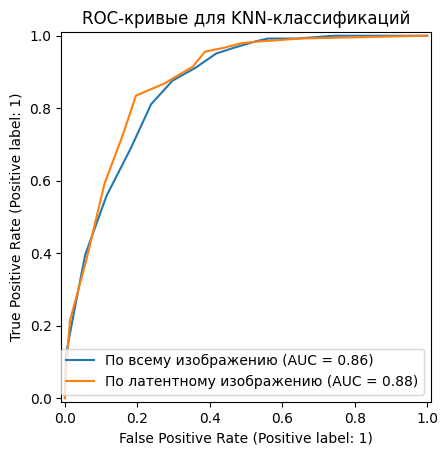

In [137]:
from sklearn.metrics import RocCurveDisplay

fig, ax = plt.subplots()

RocCurveDisplay.from_predictions(
    bin_test_labels,
    prob_full,
    name="По всему изображению",
    ax=ax
)

RocCurveDisplay.from_predictions(
    bin_test_labels,
    prob_latent,
    name="По латентному изображению",
    ax=ax
)

_ = ax.set(
    title="ROC-кривые для KNN-классификаций",
)

# 8. границы принятия решений

In [140]:
all_latent_imgs = encoder.predict(imgs_only2)
avg_latent = np.mean(all_latent_imgs, axis=0)


85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


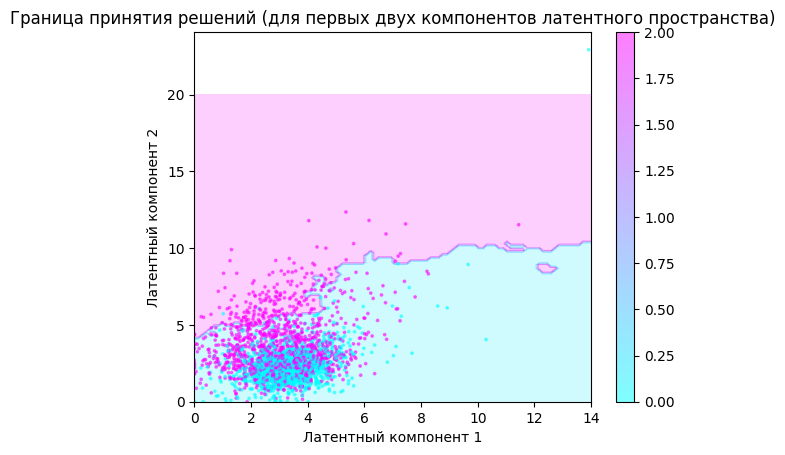

In [184]:
# plot the decision boundary of the latent space
from sklearn.inspection import DecisionBoundaryDisplay

fig, ax = plt.subplots()
x_low = 0
x_high = 14
y_low = 0
y_high = 20

xx0,xx1 = np.meshgrid(np.linspace(x_low, x_high, 100), np.linspace(y_low, y_high, 100))

predict_points = []
for x0, x1 in zip(xx0.ravel(), xx1.ravel()):
    to_predict = np.copy(avg_latent)
    to_predict[1] = x0
    to_predict[2] = x1
    predict_points.append(to_predict)


Z = knn_latent_img.predict(predict_points)


display = DecisionBoundaryDisplay(
    xx0=xx0,xx1=xx1,response=Z.reshape(xx0.shape),
)
display.plot(ax=ax, cmap='cool', alpha=0.2)

plt.scatter(imgs_only2_enc[:,1], imgs_only2_enc[:,2], c=labels_only2, cmap='cool', alpha=0.5, s=3)
plt.xlabel("Латентный компонент 1")
plt.ylabel("Латентный компонент 2")
plt.title("Граница принятия решений (для первых двух компонентов латентного пространства)")
plt.colorbar()


# 9. ошибки реструктурирования

169/169 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
[0.02317607 0.02431779 0.01930182 ... 0.0059445  0.0223996  0.00881311]


Text(0.5, 1.0, 'Распределение ошибки реструктурирования')

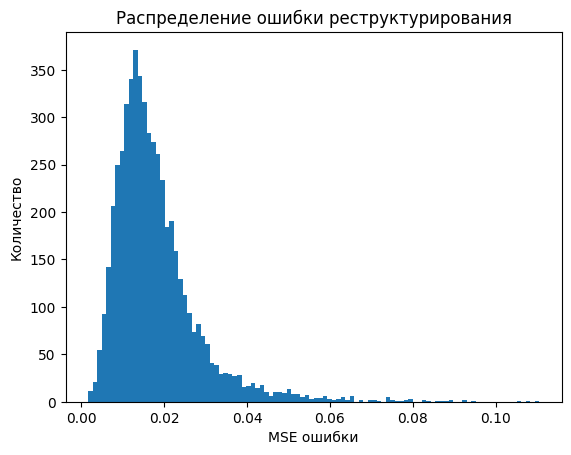

In [191]:
# try passing every image through the autoencoder
all_imgs = np.concatenate((train_images, test_images), axis=0)
all_imgs_encoded = autoencoder.predict(all_imgs)

# for each image, calculate its reconstruction error
reconstruction_errors = np.mean(np.square(all_imgs - all_imgs_encoded), axis=(1,2))

print(reconstruction_errors)
# plot the reconstruction error distribution
plt.hist(reconstruction_errors, bins=100)
plt.xlabel("MSE ошибки")
plt.ylabel("Количество")
plt.title("Распределение ошибки реструктурирования")

Text(0.5, 1.0, 'Минимальная ошибка: \n0.0016541878119756964')

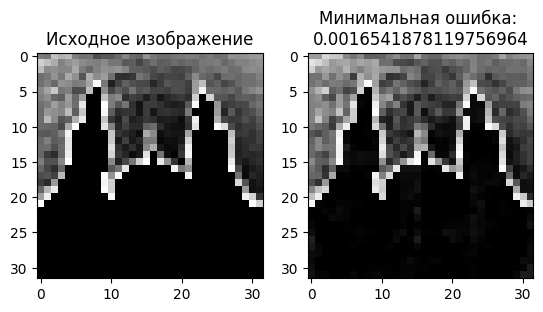

In [204]:
min_index = np.argmin(reconstruction_errors)
min_error = reconstruction_errors[min_index]

fig, (ax1, ax2) = plt.subplots(1,2)

ax1.imshow(all_imgs[min_index])
ax1.set_title("Исходное изображение")
ax2.imshow(all_imgs_encoded[min_index])
ax2.set_title("Минимальная ошибка: \n" + str(min_error))


Text(0.5, 1.0, 'Максимальная ошибка: \n0.11052589837073973')

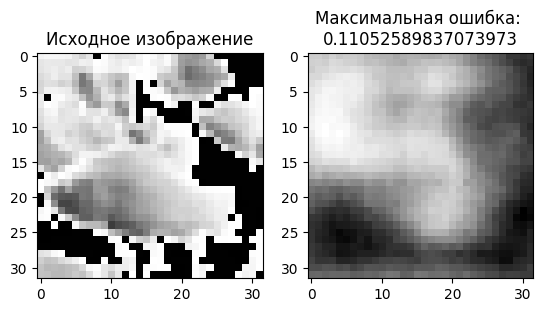

In [205]:
max_index = np.argmax(reconstruction_errors)
max_error = reconstruction_errors[max_index]

fig, (ax1, ax2) = plt.subplots(1,2)

ax1.imshow(all_imgs[max_index])
ax1.set_title("Исходное изображение")
ax2.imshow(all_imgs_encoded[max_index])
ax2.set_title("Максимальная ошибка: \n" + str(max_error))
